# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities

['saint-philippe',
 'gazojak',
 'puerto concordia',
 'east london',
 'bluff',
 'abha',
 'gazion',
 'yar-sale',
 'ushuaia',
 'illoqqortoormiut',
 'busselton',
 'punta arenas',
 'lompoc',
 'hasaki',
 'panlaitan',
 'tuatapere',
 'bethel',
 'lavrentiya',
 'roebourne',
 'inta',
 'raudeberg',
 'de-kastri',
 'mataura',
 'saskylakh',
 'novaya mayna',
 'vaini',
 'ust-tsilma',
 'hithadhoo',
 'khatanga',
 'qaqortoq',
 'poso',
 'lebu',
 'freeport',
 'taoudenni',
 'cape town',
 'kaitangata',
 'zelenogorskiy',
 'samarai',
 'albany',
 'vilyuysk',
 'rocha',
 'ahuimanu',
 'chipata',
 'tuktoyaktuk',
 'codrington',
 'luderitz',
 'la paz',
 'faanui',
 'shingu',
 'santa isabel do rio negro',
 'haines junction',
 'cherskiy',
 'nguiu',
 'hobart',
 'qaanaaq',
 'narsaq',
 'palmer',
 'egvekinot',
 'thompson',
 'majene',
 'arraial do cabo',
 'portel',
 'tocopilla',
 'san cristobal',
 'rikitea',
 'kapaa',
 'tres arroyos',
 'castro',
 'jamestown',
 'atuona',
 'mar del plata',
 'mitsamiouli',
 'hilo',
 'bac lieu',


In [4]:
# Create lists to store weather data

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print ("Beginning Data Retrieval")
print ("-----------------------------")

# Loop through cities using try-except statements

for city in cities:
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?"
        query_url = url + "appid=" + api_key + "&q=" + city
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_name.append(weather_json["name"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        max_temp.append(weather_json["main"]["temp_max"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        wind_speed.append(weather_json["wind"]["speed"])
        city_record = weather_json["name"]
        print(f"Processing Record {record} | {city_record}")
        record = record + 1
    except:
        print("City not found. Skipping...")

print ("-----------------------------")
print ("Data Retrieval Complete")
print ("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | Saint-Philippe
Processing Record 2 | Gazojak
Processing Record 3 | Puerto Concordia
Processing Record 4 | East London
Processing Record 5 | Bluff
Processing Record 6 | Abha
City not found. Skipping...
Processing Record 7 | Yar-Sale
Processing Record 8 | Ushuaia
City not found. Skipping...
Processing Record 9 | Busselton
Processing Record 10 | Punta Arenas
Processing Record 11 | Lompoc
Processing Record 12 | Hasaki
Processing Record 13 | Panlaitan
Processing Record 14 | Tuatapere
Processing Record 15 | Bethel
Processing Record 16 | Lavrentiya
Processing Record 17 | Roebourne
Processing Record 18 | Inta
Processing Record 19 | Raudeberg
Processing Record 20 | De-Kastri
Processing Record 21 | Mataura
Processing Record 22 | Saskylakh
Processing Record 23 | Novaya Mayna
Processing Record 24 | Vaini
Processing Record 25 | Ust-Tsilma
Processing Record 26 | Hithadhoo
Processing Record 27 | Khatanga
Processing Record 28

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
# Store data in a dictionary
weather_data = {
    "City" : city_name,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Wind Speed": wind_speed}

# Convert dictionary into a data frame
weather_data_df = pd.DataFrame(weather_data)

# Convert Max Temp from Kelvin to Fahrenheit
def kelv_to_fah(x):
    x = ((x - 273) * (9.0/5.0)) + 32
    return format(x, '.2f')

weather_data_df["Max Temp"] = weather_data_df["Max Temp"].apply(kelv_to_fah)

# Save to CSV file
weather_data_df.to_csv('WeatherPy_Data.csv')

In [6]:
weather_data_df.count()

City          538
Cloudiness    538
Country       538
Date          538
Humidity      538
Lat           538
Lng           538
Max Temp      538
Wind Speed    538
dtype: int64

In [33]:
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint-Philippe,90,CA,1577770868,100,45.36,-73.48,33.28,5.10
1,Gazojak,48,TM,1577770869,67,41.19,61.40,38.75,3.61
2,Puerto Concordia,65,CO,1577770869,91,2.62,-72.76,71.78,0.87
3,East London,99,ZA,1577770869,73,-33.02,27.91,70.07,1.50
4,Bluff,0,AU,1577770869,18,-23.58,149.07,94.77,4.94


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

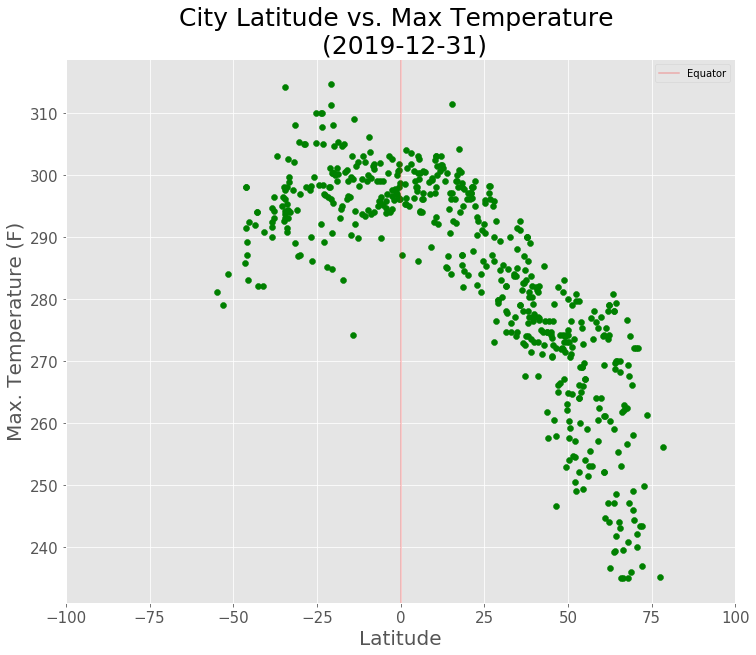

In [31]:
# Create scatter plot

plt.title("City Latitude vs. Max Temperature \n (%s)" % datetime.today().strftime('%Y-%m-%d'), fontsize = 25)
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Max. Temperature (F)", fontsize = 20)
plt.gcf().set_size_inches((12, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-100,100)

plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp"], marker="o", color = 'green')
plt.axvline(0, color = 'red', alpha = .25, label='Equator')
plt.legend()
plt.style.use("ggplot")

plt.savefig("Latitude_vs_Temperature.png")

plt.show()

### Latitude vs. Humidity Plot

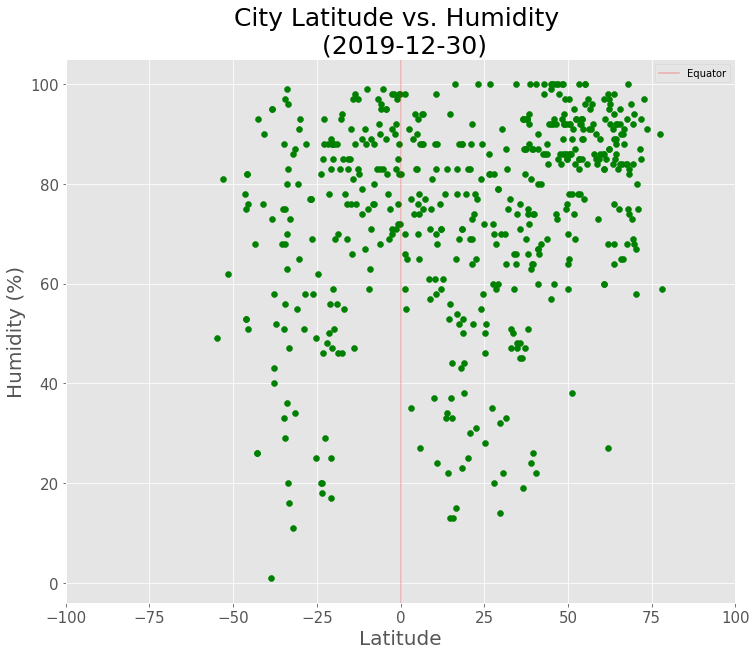

In [12]:
# Create scatter plot

plt.title("City Latitude vs. Humidity \n (%s)" % datetime.today().strftime('%Y-%m-%d'), fontsize = 25)
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Humidity (%)", fontsize = 20)
plt.gcf().set_size_inches((12, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-100,100)

plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], marker = "o", color = 'green')
plt.axvline(0, color = 'red', alpha = .25, label='Equator')
plt.legend()
plt.style.use("ggplot")

plt.savefig("Latitude_vs_Humidity.png")

plt.show()

### Latitude vs. Cloudiness Plot

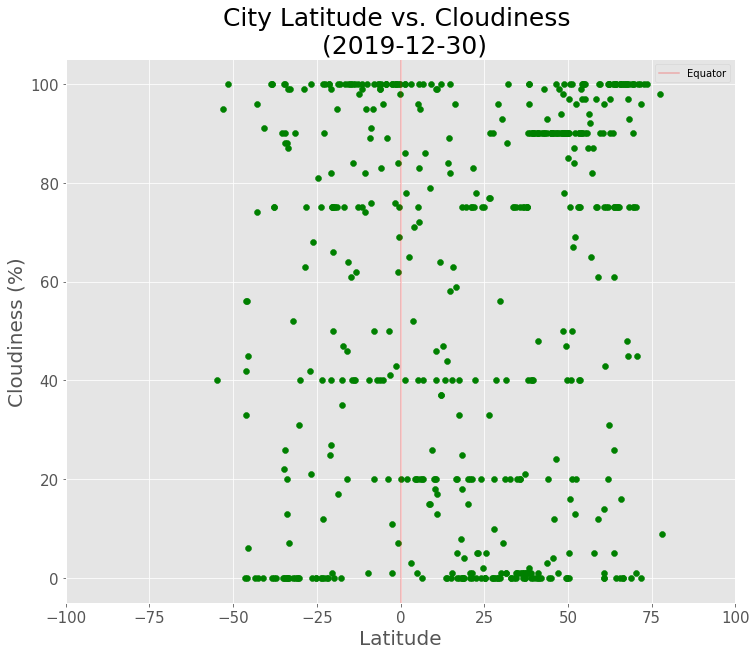

In [13]:
# Create scatter plot

plt.title("City Latitude vs. Cloudiness \n (%s)" % datetime.today().strftime('%Y-%m-%d'), fontsize = 25)
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Cloudiness (%)", fontsize = 20)
plt.gcf().set_size_inches((12, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-100,100)


plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], marker="o", color = 'green')
plt.axvline(0, color = 'red', alpha = .25, label='Equator')
plt.legend()
plt.style.use("ggplot")

plt.savefig("Latitude_vs_Cloudiness.png")

plt.show()

### Latitude vs. Wind Speed Plot

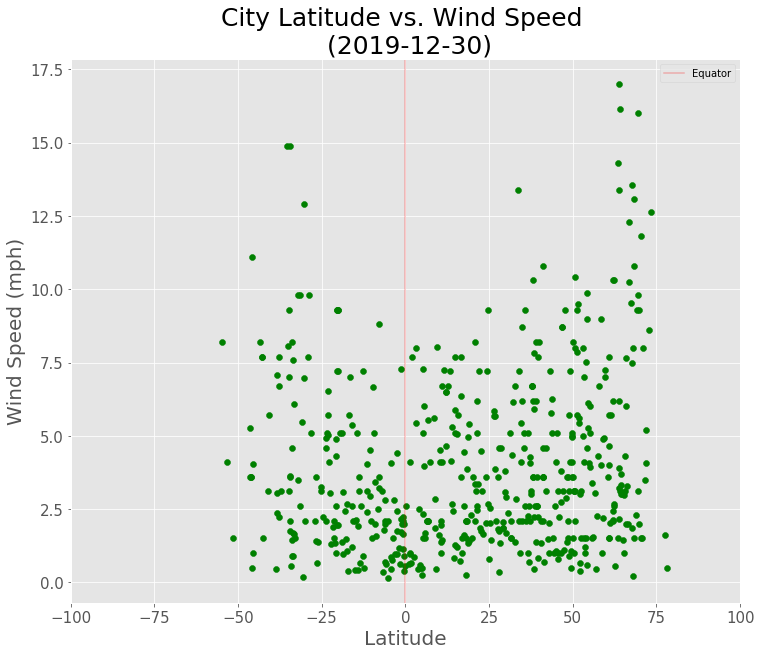

In [14]:
# Create scatter plot

plt.title("City Latitude vs. Wind Speed \n (%s)" % datetime.today().strftime('%Y-%m-%d'), fontsize = 25)
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Wind Speed (mph)", fontsize = 20)
plt.gcf().set_size_inches((12, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-100,100)

plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], marker="o", color = 'green')
plt.axvline(0, color = 'red', alpha = .25, label='Equator')
plt.legend()
plt.style.use("ggplot")

plt.savefig("Latitude_vs_WindSpeed.png")

plt.show()